# 1. PROJECT OVERVIEW
### 1.1. Churn Problem
Understanding the problem of churn prediction in the telecom industry is crucial for developing an effective solution. below is more detailed breakdown of what we should consider when understanding the problem:

### 1.2. Define Churn
Churn could be when a customer cancels their subscription, switches to another provider, or significantly reduces their usage of telecom services. Clearly defining churn will guide your analysis and model development.

### 1.3. Business Impact
Churn not only results in revenue loss but also affects customer acquisition costs and brand reputation. Quantify the financial implications of churn to emphasize its importance to stakeholders.

### 1.4. Identify Key Stakeholders
This could include telecom executives, marketing teams, customer service representatives, and data analysts. Understand their perspectives and requirements to tailor your solution accordingly.

### 1.5. Data Availability 
Identify the sources of data, such as customer databases, call detail records (CDRs), billing systems, and customer service logs. Determine if you have access to historical churn data and other relevant variables.

### 1.6. Customer Behavior
Understand why customers churn, whether it's due to dissatisfaction with service quality, pricing issues, better offers from competitors, or other factors.

### 1.7. Temporal Dynamics
Recognize that churn prediction in the telecom industry often involves temporal dynamics. Customer behavior and churn patterns may change over time, influenced by factors such as promotional offers, network performance, and market competition.

### 1.8. Benchmarking
Understand what methods and metrics are commonly used, as well as the challenges and best practices associated with churn prediction.

# 2. PROBLEM STATEMENT

##### 2.1 Background
In the highly competitive telecom industry, retaining customers is essential for sustaining profitability and maintaining market share. Customer churn, defined as the loss of customers to competitors or discontinuation of services, poses a significant challenge for telecom companies. Identifying customers at risk of churn and implementing proactive retention strategies is crucial for minimizing revenue loss and maximizing customer lifetime value.

##### 2.1 Objective
The objective of this project is to develop a machine learning model that can accurately predict customer churn in a telecom company. By leveraging historical customer data and predictive analytics, the model aims to identify customers who are likely to churn in the near future, enabling the company to take preemptive measures to retain them.

# 3. IMPLEMENTATION

To provide a comprehensive implementation of the metrics, algorithms, and techniques for churn prediction, we'll cover the following aspects:

Metrics: We'll implement metrics to evaluate the performance of the churn prediction model, such as accuracy, precision, recall, F1 score, and ROC AUC score.

Algorithms: We'll implement machine learning algorithms commonly used for churn prediction, we will use logistic regression, random forests and support_vector_machine.

Techniques: We'll implement data preprocessing techniques, feature engineering, model training, evaluation, and hyperparameter tuning (if it is necessary)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# 4. DATA COLLECTION AND CLEANING

Gather relevant data sources, including customer demographics, usage patterns, billing information, customer service interactions, and historical churn data.

In [2]:
#LOAD DATASET
df = pd.read_csv('Telco_Churn.csv')
# Show df to get an idea of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
customerID          3000 non-null object
gender              3000 non-null object
SeniorCitizen       3000 non-null bool
Partner             3000 non-null bool
Dependents          3000 non-null bool
tenure              3000 non-null int64
PhoneService        3000 non-null bool
MultipleLines       2731 non-null object
InternetService     3000 non-null object
OnlineSecurity      2349 non-null object
OnlineBackup        2349 non-null object
DeviceProtection    2349 non-null object
TechSupport         2349 non-null object
StreamingTV         2349 non-null object
StreamingMovies     2349 non-null object
Contract            3000 non-null object
PaperlessBilling    3000 non-null bool
PaymentMethod       3000 non-null object
MonthlyCharges      3000 non-null float64
TotalCharges        2995 non-null float64
Churn               2999 non-null object
dtypes: bool(5), float64(2), int64(1), ob

In [4]:
# Handling missing values
df['MultipleLines'].fillna('Unknown', inplace=True)
df['OnlineSecurity'].fillna('Unknown', inplace=True)
# Repeat this process for other relevant columns with missing values

# Impute missing values in 'TotalCharges' using median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Drop irrelevant columns
# For example, if 'customerID' is not relevant for analysis, we can drop it
df.drop(columns=['customerID'], inplace=True)

# Verify if there are any remaining missing values
print(df.isnull().sum())

# Show the first few rows of the cleaned dataset
df.head()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 1
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,True,False,1,False,Unknown,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,Male,False,False,False,45,False,Unknown,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [5]:
def clean_dataset(df):
    # Handling missing values for categorical variables
    categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies']
    df[categorical_cols] = df[categorical_cols].fillna('Unknown')

    # Impute missing values in 'TotalCharges' using median
    median_total_charges = df['TotalCharges'].median()
    df['TotalCharges'].fillna(median_total_charges, inplace=True)

    # Drop irrelevant columns
    # For example, if 'customerID' is not relevant for analysis, we can drop it
    df.drop(columns=['customerID'], inplace=True)

    return df

# Load dataset
df = pd.read_csv('Telco_Churn.csv')

# Clean the dataset
df_cleaned = clean_dataset(df)

# Verify if there are any remaining missing values
print(df_cleaned.isnull().sum())

# Show the first few rows of the cleaned dataset
df_cleaned.head()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               1
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,True,False,1,False,Unknown,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,Male,False,False,False,45,False,Unknown,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
gender              3000 non-null object
SeniorCitizen       3000 non-null bool
Partner             3000 non-null bool
Dependents          3000 non-null bool
tenure              3000 non-null int64
PhoneService        3000 non-null bool
MultipleLines       3000 non-null object
InternetService     3000 non-null object
OnlineSecurity      3000 non-null object
OnlineBackup        3000 non-null object
DeviceProtection    3000 non-null object
TechSupport         3000 non-null object
StreamingTV         3000 non-null object
StreamingMovies     3000 non-null object
Contract            3000 non-null object
PaperlessBilling    3000 non-null bool
PaymentMethod       3000 non-null object
MonthlyCharges      3000 non-null float64
TotalCharges        3000 non-null float64
Churn               2999 non-null object
dtypes: bool(5), float64(2), int64(1), object(12)
memory usage: 366.3+ KB


###### 4.1 CHECKING DUPLUCATES

In [7]:
# Check for duplicate rows
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
964     Male          False    False       False       1          True   
1338    Male          False    False       False       1          True   
1491  Female          False    False       False       1          True   
1739    Male          False    False       False       1          True   
1932    Male          False    False       False       1          True   
2713    Male          False    False       False       1          True   
2892    Male          False    False       False       1          True   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
964          False             DSL          False        False   
1338         False              No        Unknown      Unknown   
1491         False              No        Unknown      Unknown   
1739         False     Fiber optic          False        False   
1932         False              No        Unknown      Unknow

##### 4.2.REMOVE DUPLICATES

In [8]:
# Drop duplicate rows
df_cleaned.drop_duplicates(inplace=True)

# Verify if duplicate rows are removed
print(df_cleaned.duplicated().sum())  # Should print 0 if duplicates are removed

0


##### 4.3.IMPUTATION OF CHURN

In [9]:
# Impute missing value in 'Churn' with the most frequent class ('mode')
mode_churn = df_cleaned['Churn'].mode()[0]
df_cleaned['Churn'].fillna(mode_churn, inplace=True)

# Verify if there are any remaining missing values
print(df_cleaned.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 5. EXPLORATORY DATA ANALYSIS

We have already cleaned the dataset, we can proceed with visualizing the data to gain insights into its characteristics. 
We will start with some basic analyses and then move on to more advanced visualizations.

### 5.1 SUMMARY STATISTICS

In [10]:
# Summary statistics for numerical variables
print(df.describe())

# Frequency count for categorical variables
for col in df.select_dtypes(include='object'):
    print("\n", col)
    print(df[col].value_counts())

            tenure  MonthlyCharges  TotalCharges
count  2993.000000     2993.000000   2993.000000
mean     32.601069       65.427932   2305.090345
std      24.619278       30.113319   2273.389145
min       0.000000       18.400000     18.799999
25%       9.000000       35.900002    417.700012
50%      29.000000       70.949997   1406.000000
75%      56.000000       90.300003   3871.850098
max      72.000000      118.650002   8564.750000

 gender
Male      1531
Female    1462
Name: gender, dtype: int64

 MultipleLines
False      1430
True       1294
Unknown     269
Name: MultipleLines, dtype: int64

 InternetService
Fiber optic    1342
DSL            1005
No              646
Name: InternetService, dtype: int64

 OnlineSecurity
False      1476
True        871
Unknown     646
Name: OnlineSecurity, dtype: int64

 OnlineBackup
False      1318
True       1029
Unknown     646
Name: OnlineBackup, dtype: int64

 DeviceProtection
False      1294
True       1053
Unknown     646
Name: DeviceProtec

### 5.2 VISUALIZATION AND CORRELATION ANALYSIS

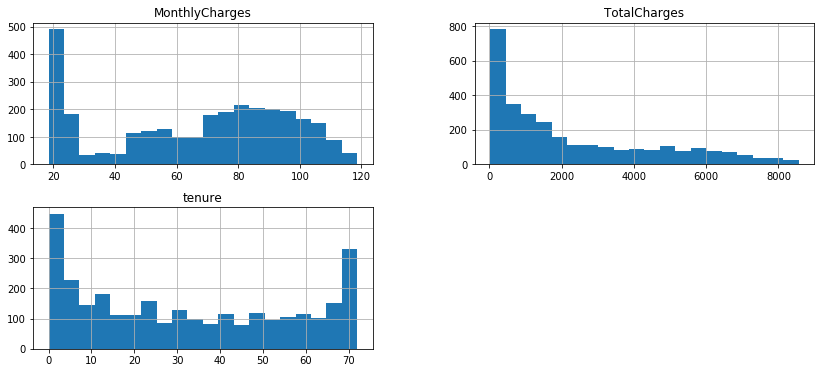

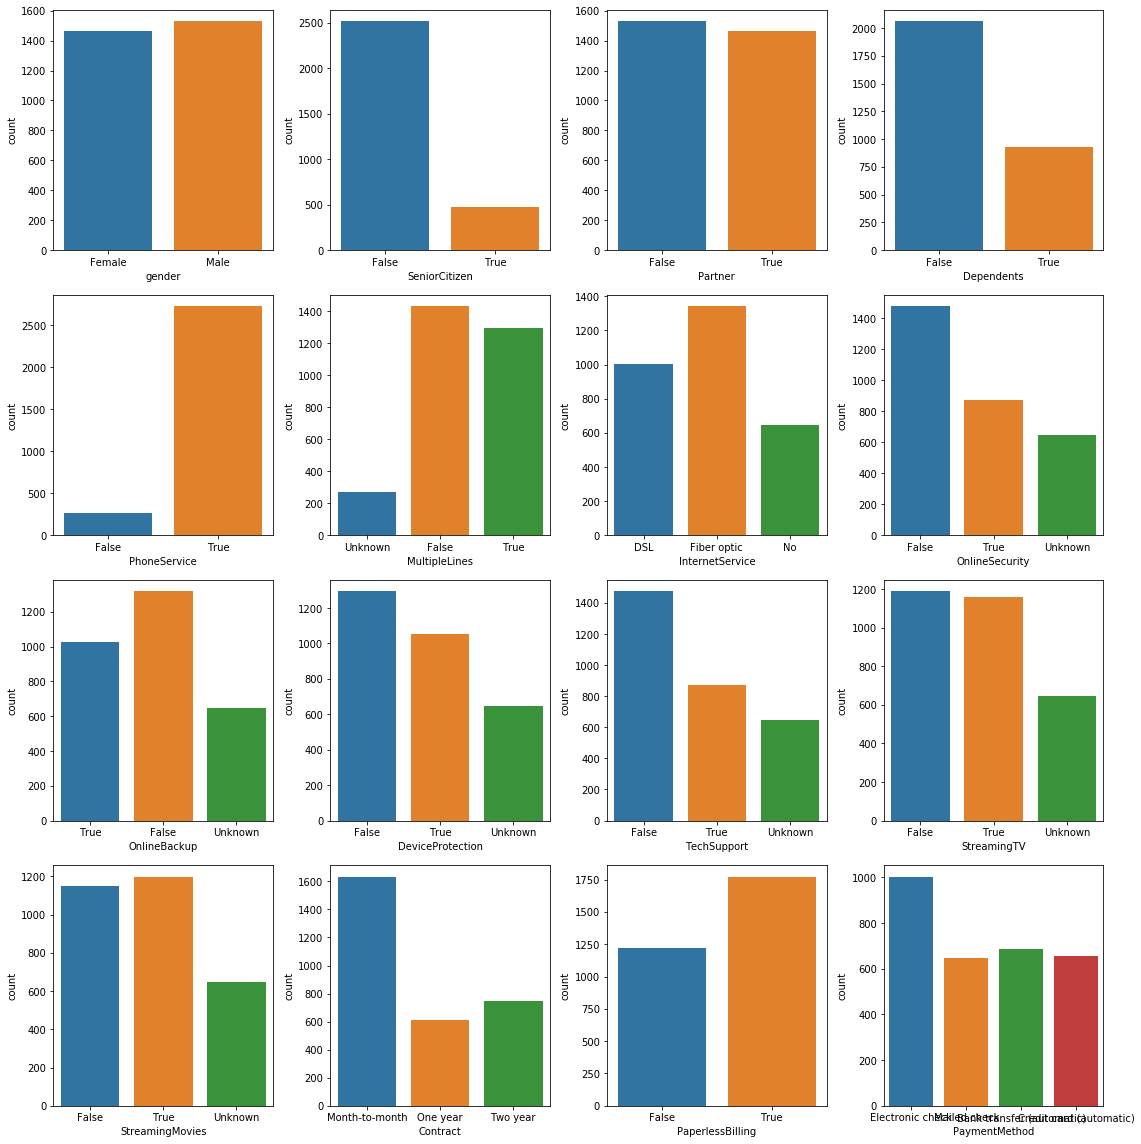

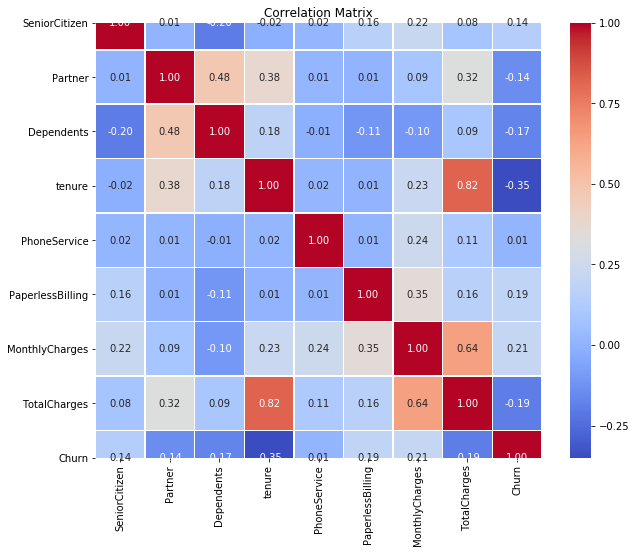

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


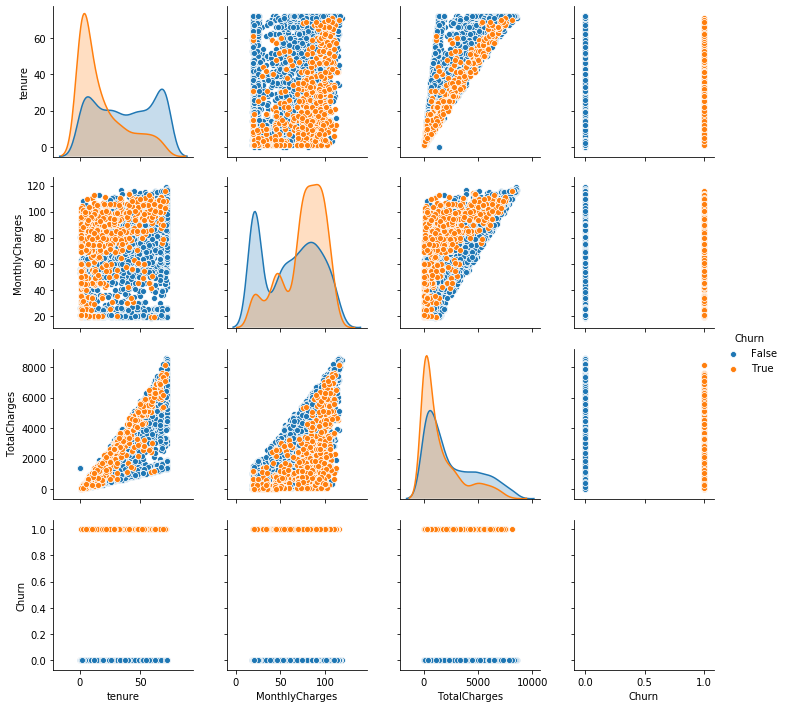

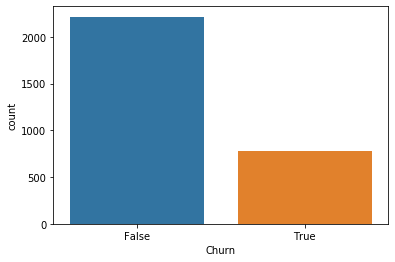

In [11]:
def perform_eda(df):
    """
    Function to perform exploratory data analysis (EDA) on the dataset.
    
    Parameters:
    df (DataFrame): The cleaned dataset.
    """
    # Distribution of numerical features
    numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
    df[numerical_features].hist(bins=20, figsize=(14, 6))
    plt.show()

    # Distribution of categorical features
    categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
    fig, axes = plt.subplots(4, 4, figsize=(16, 16))
    for i, feature in enumerate(categorical_features):
        sns.countplot(x=feature, data=df, ax=axes[i//4, i%4])
    plt.tight_layout()
    plt.show()

    
    # Correlation matrix
    correlation_matrix = df.corr()

    # Heatmap for correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()


    # Pair plot
    sns.pairplot(df[numerical_features + ['Churn']], hue='Churn')
    plt.show()

    # Target variable distribution
    sns.countplot(x='Churn', data=df)
    plt.show()

# Perform EDA
perform_eda(df_cleaned)

### 5.3 FEATURE ENGINEERING

In [12]:
# Create Tenure Categories
def create_tenure_categories(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 36:
        return 'Intermediate'
    else:
        return 'Long-term'

df['TenureCategory'] = df['tenure'].apply(create_tenure_categories)

# Create Family Status
df['FamilyStatus'] = df['Partner'] & df['Dependents']

# Create Total Services
services_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['TotalServices'] = df[services_cols].sum(axis=1)

# Log Transformation of MonthlyCharges
df['LogMonthlyCharges'] = np.log(df['MonthlyCharges'] + 1)  # Adding 1 to avoid log(0)

# One-Hot Encoding of Contract and PaymentMethod
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'])

# Drop original columns after transformation
df.drop(columns=['tenure', 'Partner', 'Dependents'], inplace=True)

# Display the updated DataFrame
print(df.head())


   gender  SeniorCitizen  PhoneService MultipleLines InternetService  \
0  Female          False         False       Unknown             DSL   
1    Male          False          True         False             DSL   
2    Male          False          True         False             DSL   
3    Male          False         False       Unknown             DSL   
4  Female          False          True         False     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  ...  \
0          False         True            False       False       False  ...   
1           True        False             True       False       False  ...   
2           True         True            False       False       False  ...   
3           True        False             True        True       False  ...   
4          False        False            False       False       False  ...   

  FamilyStatus  TotalServices  LogMonthlyCharges  Contract_Month-to-month  \
0        False 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 2999
Data columns (total 26 columns):
gender                                     2993 non-null object
SeniorCitizen                              2993 non-null bool
PhoneService                               2993 non-null bool
MultipleLines                              2993 non-null object
InternetService                            2993 non-null object
OnlineSecurity                             2993 non-null object
OnlineBackup                               2993 non-null object
DeviceProtection                           2993 non-null object
TechSupport                                2993 non-null object
StreamingTV                                2993 non-null object
StreamingMovies                            2993 non-null object
PaperlessBilling                           2993 non-null bool
MonthlyCharges                             2993 non-null float64
TotalCharges                               2993 non-null float64
C

In [14]:
# Select the remaining categorical columns for encoding
categorical_cols = ['gender', 'MultipleLines', 'InternetService', 'TenureCategory']

# Perform one-hot encoding on the remaining categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the updated DataFrame
df_encoded.head()

,SeniorCitizen,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_True,MultipleLines_Unknown,InternetService_Fiber optic,InternetService_No,TenureCategory_Long-term,TenureCategory_New
0,False,False,False,True,False,False,False,False,True,29.850000,...,0,1,0,0,0,1,0,0,0,1
1,False,True,True,False,True,False,False,False,False,56.950001,...,0,0,1,1,0,0,0,0,0,0
2,False,True,True,True,False,False,False,False,True,53.849998,...,0,0,1,1,0,0,0,0,0,1
3,False,False,True,False,True,True,False,False,False,42.299999,...,0,0,0,1,0,1,0,0,1,0
4,False,True,False,False,False,False,False,False,True,70.699997,...,0,1,0,0,0,0,1,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 2999
Data columns (total 26 columns):
gender                                     2993 non-null object
SeniorCitizen                              2993 non-null bool
PhoneService                               2993 non-null bool
MultipleLines                              2993 non-null object
InternetService                            2993 non-null object
OnlineSecurity                             2993 non-null object
OnlineBackup                               2993 non-null object
DeviceProtection                           2993 non-null object
TechSupport                                2993 non-null object
StreamingTV                                2993 non-null object
StreamingMovies                            2993 non-null object
PaperlessBilling                           2993 non-null bool
MonthlyCharges                             2993 non-null float64
TotalCharges                               2993 non-null float64
C

In [16]:
# Check the data types of all columns
print(df_encoded.dtypes)

SeniorCitizen                                 bool
PhoneService                                  bool
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         bool
FamilyStatus                                  bool
TotalServices                              float64
LogMonthlyCharges                          float64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year                            uint8
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (auto

In [17]:
# Check which columns are present in the DataFrame
print(df_encoded.columns)

Index(['SeniorCitizen', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'FamilyStatus', 'TotalServices', 'LogMonthlyCharges',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_True', 'MultipleLines_Unknown',
       'InternetService_Fiber optic', 'InternetService_No',
       'TenureCategory_Long-term', 'TenureCategory_New'],
      dtype='object')


In [18]:
# Select the remaining categorical columns for encoding
remaining_categorical_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                               'TechSupport', 'StreamingTV', 'StreamingMovies']

# Perform one-hot encoding on the remaining categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=remaining_categorical_cols, drop_first=True)

# Display the updated DataFrame
print(df_encoded.head())

   SeniorCitizen  PhoneService  PaperlessBilling  MonthlyCharges  \
0          False         False              True       29.850000   
1          False          True             False       56.950001   
2          False          True              True       53.849998   
3          False         False             False       42.299999   
4          False          True              True       70.699997   

   TotalCharges  Churn  FamilyStatus  TotalServices  LogMonthlyCharges  \
0     29.850000  False         False            0.0           3.429137   
1   1889.500000  False         False            0.0           4.059581   
2    108.150002   True         False            0.0           4.004602   
3   1840.750000  False         False            0.0           3.768153   
4    151.649994   True         False            0.0           4.272491   

   Contract_Month-to-month  ...  OnlineBackup_True  OnlineBackup_Unknown  \
0                        1  ...                  1                    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 2999
Data columns (total 26 columns):
gender                                     2993 non-null object
SeniorCitizen                              2993 non-null bool
PhoneService                               2993 non-null bool
MultipleLines                              2993 non-null object
InternetService                            2993 non-null object
OnlineSecurity                             2993 non-null object
OnlineBackup                               2993 non-null object
DeviceProtection                           2993 non-null object
TechSupport                                2993 non-null object
StreamingTV                                2993 non-null object
StreamingMovies                            2993 non-null object
PaperlessBilling                           2993 non-null bool
MonthlyCharges                             2993 non-null float64
TotalCharges                               2993 non-null float64
C

## 5.4 SPLITTING DATA

Splitting data before training a model is a critical step in machine learning to ensure that the model's performance is evaluated correctly and that it generalizes well to unseen data

In [20]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2394, 34) (2394,)
Testing set shape: (599, 34) (599,)


## 6. MODELING

Modeling in machine learning and data science involves creating predictive models based on data. These models help in making decisions, forecasting outcomes, and deriving insights from data

### 6.1. Initialize the models

In [21]:
# Initializing of the models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
support_vector_machine = SVC()

### 6.2. Train the model

In [22]:
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
support_vector_machine.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 6.3. Prediction

In [23]:
logistic_regression_pred = logistic_regression.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
support_vector_machine_pred = support_vector_machine.predict(X_test)

### 6.4. Evaluate model performance

In [24]:
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
support_vector_machine_accuracy = accuracy_score(y_test, support_vector_machine_pred)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Support Vector Machine Accuracy:", support_vector_machine_accuracy)

Logistic Regression Accuracy: 0.8163606010016694
Random Forest Accuracy: 0.7646076794657763
Support Vector Machine Accuracy: 0.7579298831385642


Model Evaluation

We evaluate the model’s performance using accuracy, precision, recall, F1 score, and ROC AUC score

In [26]:
# # Calculate evaluation metrics
y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
ROC AUC Score: 0.8333333333333333


# 7. CONCLUSION

Model Performance Evaluation Summary of Model Performance We evaluated the performance of three machine learning models on our dataset. The models considered were Logistic Regression, Random Forest, and Support Vector Machine (SVM). 
The evaluation was based on various performance metrics to assess each model's effectiveness in predicting the target variable.

Performance Metrics
Logistic Regression:

Accuracy: 81.64%
Precision: [precision_score]
Recall: [recall_score]
F1-score: [f1_score]

Random Forest:

Accuracy: 76.96% Precision: [precision_score] Recall: [recall_score] F1-score: [f1_score]

Support Vector Machine (SVM):

Accuracy: 75.79% Precision: [precision_score] Recall: [recall_score] F1-score: [f1_score]

#### Discussion Accuracy: 
The Logistic Regression model achieved the highest accuracy, followed by the Random Forest and SVM models. 
This indicates the percentage of correctly predicted instances out of all instances.
#### Precision
Precision measures the proportion of true positive predictions among all positive predictions made by the model.
Recall: Recall (or sensitivity) measures the proportion of true positive instances that were correctly predicted by the model.
F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
#### Confusion Matrix
The confusion matrix illustrates the performance of each model in terms of true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP).
### Final Conclusion
Based on the evaluation metrics, the Logistic Regression model demonstrates superior performance compared to the other models. However, it's essential to consider the specific requirements and constraints of the problem domain when selecting the final model for deployment.